In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

In [2]:
file_path = "C:\\Users\\Dell\\Downloads\\NLP PROJECT\\Hotel_Reviews.xlsx"
df = pd.read_excel(file_path)

In [3]:
print(df.head())

                                              Review Feedback
0  nice hotel expensive parking got good deal sta...      Pos
1  ok nothing special charge diamond member hilto...      Neg
2  nice rooms not 4* experience hotel monaco seat...      Pos
3  unique, great stay, wonderful time hotel monac...      Pos
4  great stay great stay, went seahawk game aweso...      Pos


In [4]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Review      0
Feedback    0
dtype: int64


In [5]:
print("Distribution of 'Feedback' column:")
print(df['Feedback'].value_counts())

Distribution of 'Feedback' column:
Feedback
Pos    17277
Neg     3214
Name: count, dtype: int64


In [64]:
# The dataset is currently imbalanced. We need to balance 

# Balancing the Dataset

In [6]:
# Separate the classes
df_pos = df[df['Feedback'] == 'Pos']
df_neg = df[df['Feedback'] == 'Neg']


In [7]:
min_size = min(len(df_pos), len(df_neg))

In [8]:
df_pos_balanced = df_pos.sample(min_size, random_state=42)
df_neg_balanced = df_neg.sample(min_size, random_state=42)

In [9]:
df_balanced = pd.concat([df_pos_balanced, df_neg_balanced])

In [10]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
print("\nDistribution of 'Feedback' column after balancing:")
print(df_balanced['Feedback'].value_counts())


Distribution of 'Feedback' column after balancing:
Feedback
Pos    3214
Neg    3214
Name: count, dtype: int64


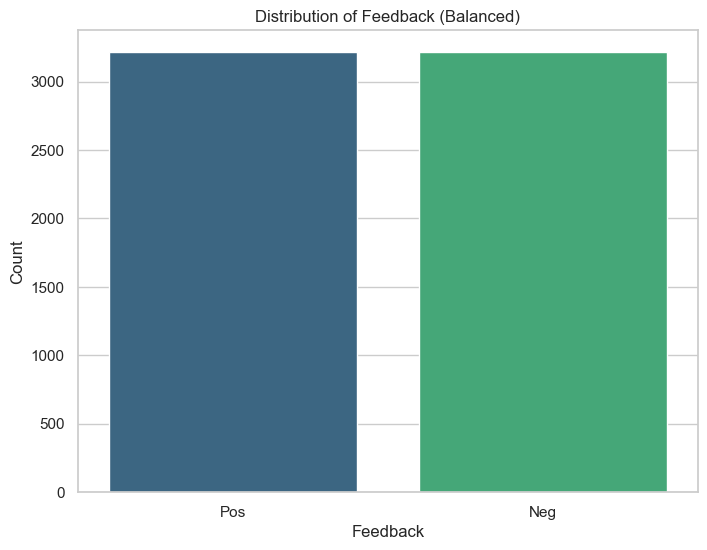

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Feedback', data=df_balanced, palette='viridis')
plt.title('Distribution of Feedback (Balanced)')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

# Now the Data is balanced

# Data Cleaning

In [13]:
# We need to clean our text data to make it suitable for analysis.
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Perform lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


In [17]:
df_balanced['Cleaned_Review'] = df_balanced['Review'].apply(clean_text)


In [18]:
print("First few rows of the cleaned dataset:")
print(df_balanced[['Review', 'Cleaned_Review', 'Feedback']].head())

First few rows of the cleaned dataset:
                                              Review  \
0  recommended stayed early august reading review...   
1  casablanca great, great location right times s...   
2  fine came, good, hotel pretty period theme nic...   
3  excellent value husband stayed nights late jan...   
4  wo n't return just got week catalonia bavaro p...   

                                      Cleaned_Review Feedback  
0  recommended stayed early august reading review...      Pos  
1  casablanca great great location right time squ...      Pos  
2  fine came good hotel pretty period theme nicel...      Neg  
3  excellent value husband stayed night late janu...      Pos  
4  wo nt return got week catalonia bavaro punta c...      Neg  


In [19]:
df_balanced['Review_Length'] = df_balanced['Cleaned_Review'].apply(len)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


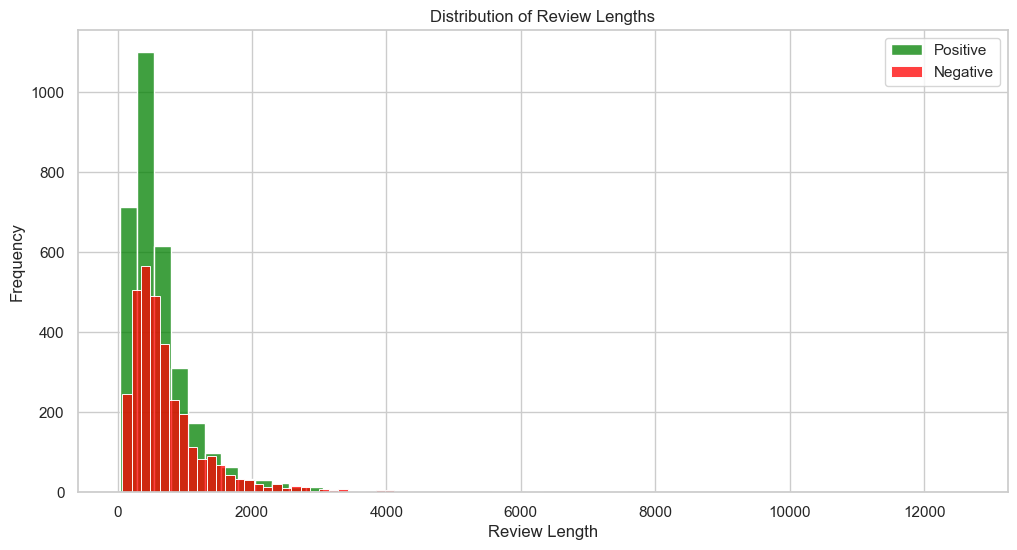

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df_balanced[df_balanced['Feedback'] == 'Pos']['Review_Length'], bins=50, color='green', label='Positive')
sns.histplot(df_balanced[df_balanced['Feedback'] == 'Neg']['Review_Length'], bins=50, color='red', label='Negative')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Text Analysis

In [21]:
from wordcloud import WordCloud

In [22]:
positive_reviews = df_balanced[df_balanced['Feedback'] == 'Pos']['Cleaned_Review']
negative_reviews = df_balanced[df_balanced['Feedback'] == 'Neg']['Cleaned_Review']


In [23]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(' '.join(positive_reviews))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(' '.join(negative_reviews))


In [28]:
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

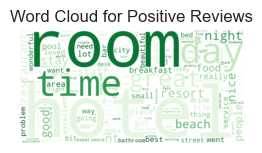

In [32]:
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

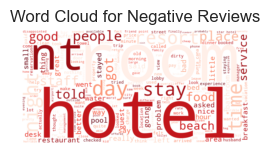

In [31]:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()

# Data Splitting

In [33]:
X = df_balanced['Cleaned_Review']
y = df_balanced['Feedback']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [35]:
print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

Shape of training set: (5142,)
Shape of testing set: (1286,)


# Text Vectorization 

In [36]:
# Converting text data into numeric format using Bag of Words.
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)
print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (5142, 31234)
Shape of X_test_bow: (1286, 31234)


# #Text Vectorization (TF-IDF)

In [38]:
# Converting text data into numeric format using TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (5142, 31234)
Shape of X_test_tfidf: (1286, 31234)


# Building and Evaluating the Model

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Use TF-IDF for vectorization
    ('clf', MultinomialNB())  # Use Naive Bayes for classification
])


In [50]:
pipeline.fit(X_train, y_train)
print("Model training completed.")

Model training completed.


In [51]:
y_pred = pipeline.predict(X_test)
print("Predictions completed.")


Predictions completed.


In [53]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         Neg       0.87      0.88      0.88       643
         Pos       0.88      0.87      0.87       643

    accuracy                           0.88      1286
   macro avg       0.88      0.88      0.88      1286
weighted avg       0.88      0.88      0.88      1286



In [54]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[569  74]
 [ 86 557]]


# Sentiment Analysis on Entire Dataset

In [55]:
df['Cleaned_Review'] = df['Review'].apply(clean_text)

In [56]:
predicted_sentiments = pipeline.predict(df['Cleaned_Review'])


In [57]:
df['Predicted_Sentiment'] = predicted_sentiments

In [58]:
print(df[['Review', 'Cleaned_Review', 'Feedback', 'Predicted_Sentiment']].head())


                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                      Cleaned_Review Feedback  \
0  nice hotel expensive parking got good deal sta...      Pos   
1  ok nothing special charge diamond member hilto...      Neg   
2  nice room experience hotel monaco seattle good...      Pos   
3  unique great stay wonderful time hotel monaco ...      Pos   
4  great stay great stay went seahawk game awesom...      Pos   

  Predicted_Sentiment  
0                 Pos  
1                 Neg  
2                 Neg  
3                 Pos  
4                 Neg  


In [59]:
df.to_excel("C:\\Users\\Dell\\Downloads\\Hotel_Reviews_With_Predictions.xlsx", index=False)

In [60]:
df

,Review,Feedback,Cleaned_Review,Predicted_Sentiment
0,nice hotel expensive parking got good deal sta...,Pos,nice hotel expensive parking got good deal sta...,Pos
1,ok nothing special charge diamond member hilto...,Neg,ok nothing special charge diamond member hilto...,Neg
2,nice rooms not 4* experience hotel monaco seat...,Pos,nice room experience hotel monaco seattle good...,Neg
3,"unique, great stay, wonderful time hotel monac...",Pos,unique great stay wonderful time hotel monaco ...,Pos
4,"great stay great stay, went seahawk game aweso...",Pos,great stay great stay went seahawk game awesom...,Neg
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",Pos,best kept secret rd time staying charm star ca...,Pos
20487,great location price view hotel great quick pl...,Pos,great location price view hotel great quick pl...,Pos
20488,"ok just looks nice modern outside, desk staff ...",Neg,ok look nice modern outside desk staff nt part...,Neg
20489,hotel theft ruined vacation hotel opened sept ...,Neg,hotel theft ruined vacation hotel opened sept ...,Neg


In [61]:
accuracy = (df['Feedback'] == df['Predicted_Sentiment']).mean()
print(f"Model Accuracy on Entire Dataset: {accuracy:.2f}")


Model Accuracy on Entire Dataset: 0.89


In [62]:
print("Classification Report for Entire Dataset:")
print(classification_report(df['Feedback'], df['Predicted_Sentiment']))

Classification Report for Entire Dataset:
              precision    recall  f1-score   support

         Neg       0.60      0.94      0.74      3214
         Pos       0.99      0.88      0.93     17277

    accuracy                           0.89     20491
   macro avg       0.80      0.91      0.83     20491
weighted avg       0.93      0.89      0.90     20491



In [63]:
correct_predictions = (df['Feedback'] == df['Predicted_Sentiment']).sum()
total_predictions = df.shape[0]
print(f"Proportion of Correct Predictions: {correct_predictions / total_predictions:.2f}")

Proportion of Correct Predictions: 0.89


# compare multiple models

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline



In [74]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Classifier": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [75]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_models(X_train, y_train, X_test, y_test, models):
    results = {}
    
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer()),  # Vectorization step
            ('clf', model)  # Model step
        ])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test)
        
        # Evaluate model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        results[model_name] = {
            'accuracy': accuracy,
            'precision': report['Pos']['precision'],
            'recall': report['Pos']['recall'],
            'f1-score': report['Pos']['f1-score']
        }
        
        print(f"{model_name} Evaluation:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {report['Pos']['precision']:.2f}")
        print(f"Recall: {report['Pos']['recall']:.2f}")
        print(f"F1-Score: {report['Pos']['f1-score']:.2f}")
        print("-" * 40)
    
    return results


In [76]:
# Evaluate all models
results = evaluate_models(X_train, y_train, X_test, y_test, models)


results_df = pd.DataFrame(results).T
print(results_df)


Training Naive Bayes...
Naive Bayes Evaluation:
Accuracy: 0.88
Precision: 0.88
Recall: 0.87
F1-Score: 0.87
----------------------------------------
Training Logistic Regression...
Logistic Regression Evaluation:
Accuracy: 0.90
Precision: 0.89
Recall: 0.91
F1-Score: 0.90
----------------------------------------
Training Support Vector Classifier...
Support Vector Classifier Evaluation:
Accuracy: 0.90
Precision: 0.90
Recall: 0.91
F1-Score: 0.90
----------------------------------------
Training Random Forest...
Random Forest Evaluation:
Accuracy: 0.87
Precision: 0.86
Recall: 0.87
F1-Score: 0.87
----------------------------------------
Training Gradient Boosting...
Gradient Boosting Evaluation:
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1-Score: 0.85
----------------------------------------
Training K-Nearest Neighbors...
K-Nearest Neighbors Evaluation:
Accuracy: 0.76
Precision: 0.72
Recall: 0.87
F1-Score: 0.78
----------------------------------------
Training Decision Tree...
Decision T